### Importing packages for assignment and loading data into notebook

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

op_df = pd.read_csv('C:\\Users\\drh4u\\OneDrive\\Documents\\W&M Fall 2020\\BUAD 5112\\M2\\OpidsVA.csv')
pres_df = pd.read_csv('C:\\Users\\drh4u\\OneDrive\\Documents\\W&M Fall 2020\\BUAD 5112\\M2\\presidents.csv')
nsa_df = pd.read_csv('C:\\Users\\drh4u\\OneDrive\\Documents\\W&M Fall 2020\\BUAD 5112\\M2\\TOTALNSA.csv')

In [101]:
#op_df.head(10)
#pres_df.head(10)
nsa_df.tail(10)

,DATE,TOTALNSA
503,2017-12-01,1638.675
504,2018-01-01,1181.715
505,2018-02-01,1328.140
506,2018-03-01,1687.609
507,2018-04-01,1391.226
508,2018-05-01,1626.487
509,2018-06-01,1586.668
510,2018-07-01,1403.206
511,2018-08-01,1521.287
512,2018-09-01,1469.569


### Question 1: Do opioid overdoes tend to be associated with less affluent areas—that is, areas where families have lower incomes?

As shown in the scatter plot below, opioid overdose rates are higher in VA counties with lower median household incomes.

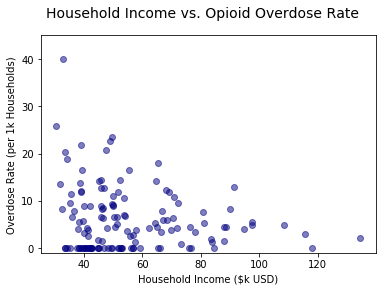

In [45]:
x = np.array(op_df['MedianHouseholdIncome'])
y = np.array(op_df['FPOO-Rate'])

fig, ax = plt.subplots()
ax.scatter(x/1000, y, c = 'navy', alpha = 0.5)
fig.suptitle('Household Income vs. Opioid Overdose Rate', fontsize = 14)
ax.xaxis.set_label_text('Household Income ($k USD)')
ax.yaxis.set_label_text('Overdose Rate (per 1k Households)')
ax.set_ylim(-1,45)
plt.show()

### Question 2: Some people who start with opioid addictions are reported to transition to heroin use. What is the relationship in Virginia counties between opioid overdoses and heroin overdoses? 

The scatter plot below does show instances of counties where the fentanyl/heroin OD rate increases as the opioid OD rate increases; however, there are many counties where either fentanyl/heroin or opioid ODs do not exist. This could suggest that certain areas are exposed to one group of narcotics while other areas are exposed to the other. This would imply more of a geographic impact than a substitution effect.

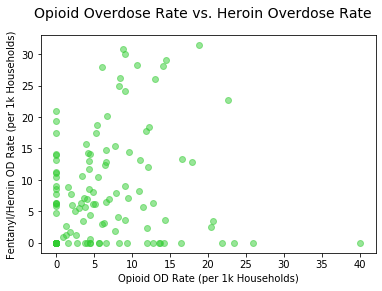

In [48]:
x = np.array(op_df['FPOO-Rate'])
y = np.array(op_df['FFHO-Rate'])

#hhi = np.array(op_df['MedianHouseholdIncome'])
#hhi_med = np.median(hhi)
#color = ['firebrick' if hhi >= hhi_med else 'green' for hhi in hhi]

fig, ax = plt.subplots()
ax.scatter(x, y, c = "limegreen", alpha = 0.5)
fig.suptitle('Opioid Overdose Rate vs. Heroin Overdose Rate', fontsize = 14)
ax.xaxis.set_label_text('Opioid OD Rate (per 1k Households)')
ax.yaxis.set_label_text('Fentanyl/Heroin OD Rate (per 1k Households)')

plt.show()

### Question 3: Which states are associated with the greatest number of United States presidents in terms of the presidents’ birthplaces?

Virginia, Ohio, New York and Massachusetts are the top four states in terms of presidents with eight, seven, five and four respectively.  These four states alone have contributed 50% of our presidents.

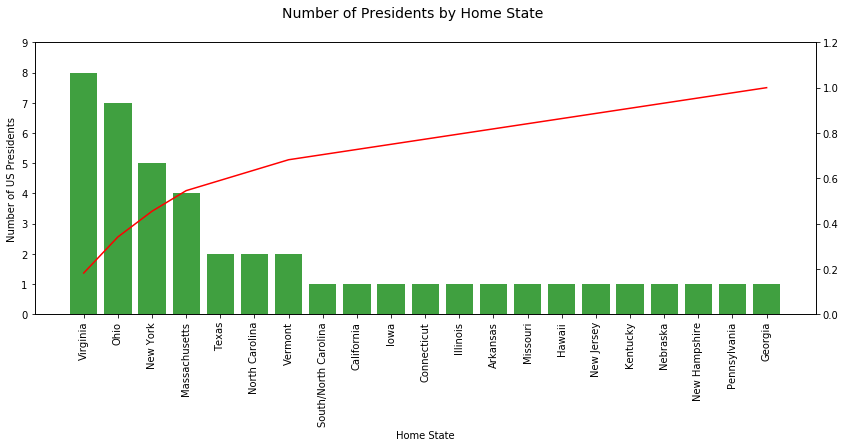

In [100]:
presidents = pres_df['State']
pres = dict(presidents.value_counts())  
x = list(dict.keys(pres))  # the state names in order of highest to lowest
y = list(dict.values(pres))  # the corresponding counts for each state
max_y = max(y)

pres_cum = []
for i in range(len(y)):
    pres_cum.append(sum(y[0:i+1])/sum(y)) 

fig, ax = plt.subplots()
ax.bar(x,y, color='g', alpha=0.75)  # should've named the 'x' series data something different to avoid confusion

fig.set_size_inches(14,5)
fig.suptitle('Number of Presidents by Home State', fontsize = 14)
ax.xaxis.set_label_text('Home State')
ax.yaxis.set_label_text('Number of US Presidents')
ax.set_ylim(0,max_y + 1)  #adding buffer to the y-axis
plt.xticks(rotation=90)

# Construct a second y-axis
ax1 = ax.twinx()
ax1.plot(pres_cum,color='red')
ax1.set_ylim(0,1.2)     # The second y-axis is a percentage scale from zero to 100%

plt.show()

### Question 4: How have vehicle sales in the United States varied over time?

Vehicle sales have varied in terms of both seasonality and cyclicality over the past 40 years. The seasonal variance shows stronger sales each year over the late spring and summer months which is driven by common promotional periods tied to either Memorial Day, 4th of July and Labor Day. Cyclical variance corresponds to recessionary periods on three occasions including the early 2000s.

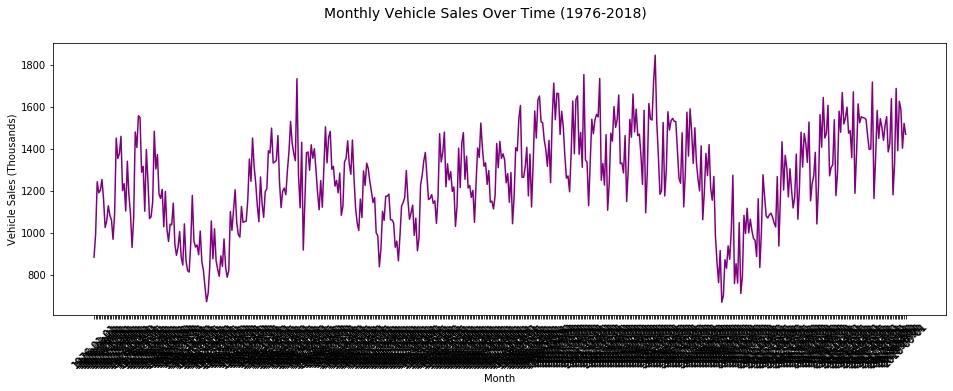

In [102]:
fig,ax = plt.subplots()
fig.set_size_inches(16,5)
ax.plot(nsa_df['DATE'], nsa_df['TOTALNSA'], color = 'purple')
fig.suptitle('Monthly Vehicle Sales Over Time (1976-2018)', fontsize = 14)
ax.xaxis.set_label_text('Month')
ax.yaxis.set_label_text('Vehicle Sales (Thousands)')

plt.xticks(rotation=45)
plt.show()